# ANOVA feature selection for numeric input and categorical output

In [2]:

from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X,y=make_classification(n_samples=200,n_features=20,n_informative=2)
X.shape
# Original dataframe with 20 features

(200, 20)

In [3]:
#Define feature selection 
feautre_selected = SelectKBest(score_func=f_classif,k=2)
feautre_selected.fit_transform(X,y).shape

# Original feautres = 20 but they got reduced to 2 with SelectKbest approach

(200, 2)

In [ ]:
# Score function can be 
f_classif
#ANOVA F-value between label/feature for classification tasks.

mutual_info_classif
#Mutual information for a discrete target.

chi2
#Chi-squared stats of non-negative features for classification tasks.

f_regression
#F-value between label/feature for regression tasks.

mutual_info_regression
#Mutual information for a continuous target.


In [ ]:
# Feature selection method can be 
SelectPercentile
#Select features based on percentile of the highest scores.

SelectFpr
#Select features based on a false positive rate test.

SelectFdr
#Select features based on an estimated false discovery rate.

SelectFwe
#Select features based on family-wise error rate.

GenericUnivariateSelect
#Univariate feature selector with configurable mode.

# Pearson's Correlation Feature Selection for Numerical Input vs Numerical Output

In [5]:

from sklearn.datasets import make_regression
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X,y=make_regression(n_samples=200,n_features=20,n_informative=10)
X.shape
# Original dataframe with 20 features

(200, 20)

In [7]:
#Define feature selection 
feautre_selected = SelectKBest(score_func=f_regression,k=10)
feautre_selected.fit_transform(X,y).shape

# Original feautres = 20 but they got reduced to 10 with SelectKbest approach

(200, 10)

# Feauture selection using Corr plot

In [29]:
# To plot heatmap
import seaborn

# Importing Dataset
from vega_datasets import data
car=data.cars()
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              406 non-null    object        
 1   Miles_per_Gallon  398 non-null    float64       
 2   Cylinders         406 non-null    int64         
 3   Displacement      406 non-null    float64       
 4   Horsepower        400 non-null    float64       
 5   Weight_in_lbs     406 non-null    int64         
 6   Acceleration      406 non-null    float64       
 7   Year              406 non-null    datetime64[ns]
 8   Origin            406 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [30]:
# Removing non numeric values before running the corr() fucntion
car.drop(columns=['Name','Year','Origin'],inplace=True)
car.columns

Index(['Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration'],
      dtype='object')

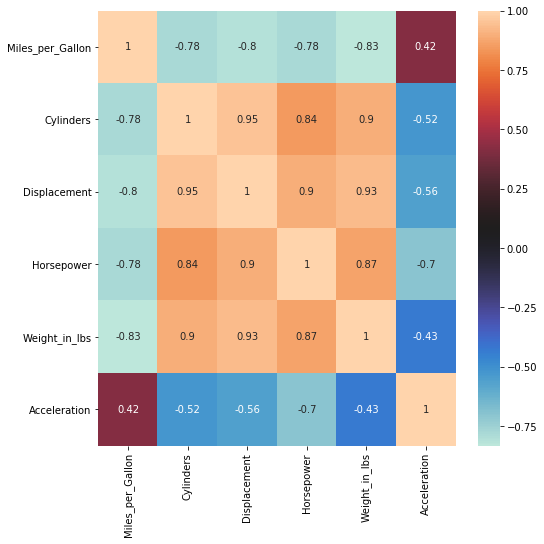

In [34]:
# Sets the display size
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
seaborn.heatmap(car.corr(),annot=True,cmap='icefire')

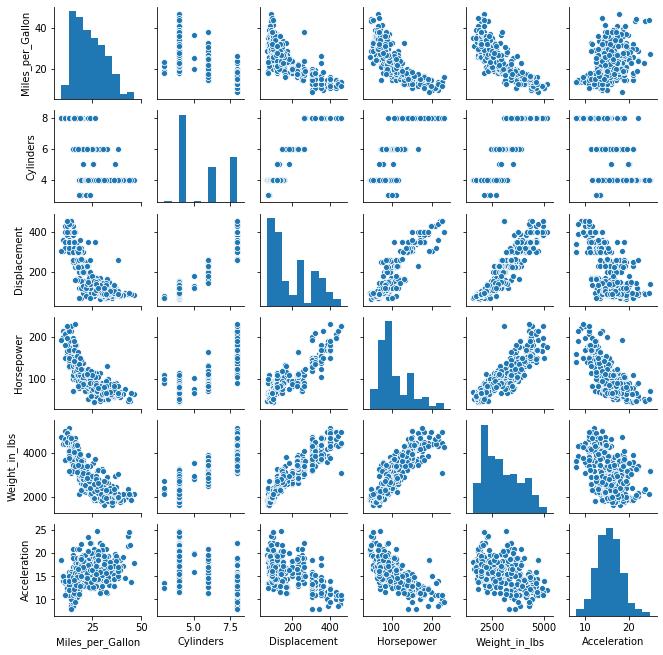

In [36]:
# Pair plot 
seaborn.pairplot(car,height=1.5)

# Feature selection using Fisher's Score

In [107]:
import seaborn as sns
titanic_data_set= sns.load_dataset('titanic')
titanic_data_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [161]:
# Only Choosing categorical variables
titanic_data_set= titanic_data_set.dropna()
X=titanic_data_set[['pclass','sex','sibsp','parch','class','who','alive','alone']]
y=titanic_data_set['survived']
X.count(),y.count()

(pclass    184
 sex       184
 sibsp     184
 parch     184
 class     184
 who       184
 alive     184
 alone     184
 dtype: int64,
 184)

In [162]:
X.isnull().sum()

pclass    0
sex       0
sibsp     0
parch     0
class     0
who       0
alive     0
alone     0
dtype: int64

In [163]:
sex={'male':0,'female':1}
class_={'First':0,'Second':1,'Third':2}
who={'man':0,'woman':1}
alive={'no':0,'yes':1}
alone={True:1,False:0}

X['sex'] = X['sex'].map(sex)
X['class'] = X['class'].map(class_)
X['who'] = X['who'].map(who)
X['alive'] = X['alive'].map(alive)
X['alone'] = X['alone'].map(alone)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [165]:
X.drop(columns='who',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [167]:
from sklearn.feature_selection import chi2
f_score= chi2(X_train,y_train)

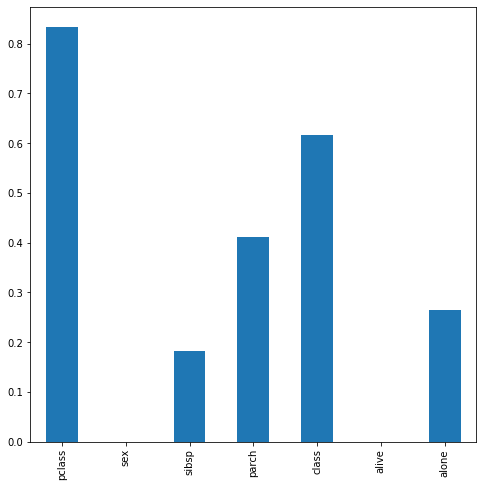

In [177]:
import pandas as pd
p_value = pd.Series(f_score[1],index=X_train.columns)
plt.figure(figsize=(8,8))
p_value.plot.bar()


# Forward Feature Selection

In [183]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forward_feature_selection = SequentialFeatureSelector(clf,k_features='best',forward=True,scoring='accuracy',cv=5)
ff=forward_feature_selection.fit(X_train, y_train)
feat_cols = list(ff.k_feature_idx_)
print(feat_cols)

[5]


# Backward Feature Elimination


In [192]:
from sklearn.linear_model import LogisticRegression 
from mlxtend.feature_selection import SequentialFeatureSelector
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=500) 
lr.fit(X, y) 
bfs = SequentialFeatureSelector(lr, k_features='best', forward = False, n_jobs=-1)
bfs.fit(X, y) 
features = list(bfs.k_feature_names_)
print(features) 


['pclass', 'sex', 'sibsp', 'parch', 'class', 'alive', 'alone']


# Exhaustive Feature Selection



In [197]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
EFS = ExhaustiveFeatureSelector(RandomForestClassifier(),min_features=4,max_features=7,scoring='roc_auc',cv=2)
EFS =EFS.fit(X,y)
print(X.columns[list(EFS.best_idx_)])

Features: 64/64

Index(['pclass', 'sex', 'sibsp', 'alive'], dtype='object')
